### Imports & Setting

In [185]:
## library imports
library(forecast)
library(fUnitRoots)
library(portes)
library(astsa)
library(sarima)

## setting
options(repr.plot.width = 15, repr.plot.height = 8)
setwd("~/TS2024/data/Time Series Data/")

### 1번 문제

In [ ]:
##----------(6) acf/pacf plot----------
data1 = list(acf = as.numeric(strsplit("-0.48 -0.04 -0.06 0.14 -0.22 0.19 -0.10 -0.02 0.09 -0.03 -0.12 0.09 0.03", " ")[[1]]),
             pacf = as.numeric(strsplit("-0.48 -0.24 -0.21 0.01 -0.20 -0.01 -0.05 -0.15 -0.04 -0.06 -0.04 0.02 0.06", " ")[[1]]))
data2 = list(acf = as.numeric(strsplit("0.59 0.44 0.33 0.23 0.24 0.16 0.05 0.01 -0.03 -0.11 -0.08 -0.07 0.01", " ")[[1]]),
             pacf = as.numeric(strsplit("0.59 0.13 0.04 -0.02 0.12 -0.05 -0.12 -0.03 -0.01 -0.13 0.06 0.04 0.13", " ")[[1]]))
data3 = list(acf = as.numeric(strsplit("-0.44 -0.05 -0.01 -0.03 0.12 -0.15 0.15 -0.04 -0.10 0.09 0.08 -0.07 0.06", " ")[[1]]),
             pacf = as.numeric(strsplit("-0.44 -0.31 -0.25 -0.25 -0.07 -0.21 -0.01 0.02 -0.09 -0.02 0.03 -0.02 0.01", " ")[[1]]))
data = list(data1, data2, data3)

for (i in 1:3) {
    if (i != 3) {
        data[[i]] = append(list(crit = 1.96*(cumsum(c(1, 2*data[[i]][[1]]^2))/100)^0.5), data[[i]])
    }

    else {
        data[[i]] = append(list(crit = 1.96*(cumsum(c(1, 2*data[[i]][[1]]^2))/99)^0.5), data[[i]])
    }
}

## plotting 3 plots
for (i in 1:3) {
    par(mfrow = c(1,2))
    plot(x = 1:13, y = data[[i]]$acf, type = "n", ylim = c(-1, 1), main = paste("data", i,"ACF"), xlab = "lag", ylab = "ACF")
    abline(h = 0)
    segments(x0 = 1:13, y0 = 0, x1 = 1:13, y1 = data[[i]]$acf)
    lines(x = 1:13, y = data[[i]]$crit[-14], lty = 2, col = "skyblue", lwd = 2)
    lines(x = 1:13, y = -data[[i]]$crit[-14], lty = 2, col = "skyblue", lwd = 2)

    plot(x = 1:13, y = data[[i]]$pacf, type = "n", ylim = c(-1, 1), main = paste("data", i,"PACF"), xlab = "lag", ylab = "PACF")
    abline(h = 0)
    segments(x0 = 1:13, y0 = 0, x1 = 1:13, y1 = data[[i]]$pacf)
    abline(h = 0.2, lty = 2, col = "skyblue", lwd = 2)
    abline(h = -0.2, lty = 2, col = "skyblue", lwd = 2)
}

### 2번 문제

In [ ]:
## data
z1 = scan("ex8_2a.txt")
z2 = scan("ex8_2b.txt")

##----------ex8_2a.txt data 분석----------
tsdisplay(z1, main = "ex8_2a.txt의 시계열 그림 및 SACF/SPACF", cex.main = 2)
t.test(z1)
adfTest(z1, lags = 1, type = "c") ## 평균 수준이 0이 아님

## AR(2) process : 선택 모형
fit1 = arima(z1, order = c(2,0,0), include.mean = T)
lmtest::coeftest(fit1)
t.test(fit1$residuals)
tseries::jarque.bera.test(fit1$fit1$residuals) ## H0 : normal distribution
portes::LjungBox(fit1, lags = c(6, 12, 18, 24)) ## H0 : rho1 = ... = rho_k(White noise)
astsa::sarima(z1, p=2, d=0, q=0)

## MA(3) process
fit2 = arima(z1, order = c(0,0,3), include.mean = T)
lmtest::coeftest(fit2)
astsa::sarima(z1, p=0, d=0, q=3)

## auto.arima 결과
forecast::auto.arima(z1, d=0, ic='aic', trace = T) ## 차분 없음

##----------ex8_2b.txt data 분석----------
tsdisplay(z2, main = "ex8_2b.txt의 시계열 그림 및 SACF/SPACF", cex.main = 2)
t.test(z2)
adfTest(z2, lags = 1, type = "c") ## 평균 수준이 0이 아님

## AR(1) process : 선택 모형
fit1 = arima(z2, order = c(1,0,0), include.mean = T)
lmtest::coeftest(fit1)
t.test(fit1$residuals)
tseries::jarque.bera.test(fit1$fit1$residuals)
portes::LjungBox(fit1, lags = c(6, 12, 18, 24))
astsa::sarima(z2, p=1, d=0, q=0)

## MA(3) process
fit2 = arima(z2, order = c(0,0,3), include.mean = T)
lmtest::coeftest(fit2)
astsa::sarima(z2, p=0, d=0, q=3)

## auto.arima 결과
forecast::auto.arima(z2, d=0, ic='aic', trace = T) ## 차분 없음

### 4번 문제

In [ ]:
start = c(44.00, 46.154)

for (i in 1:100) {
    start = c(start, 16.5 + 1.38*start[i+1] - 0.7*start[i])
}

plot(101:202, start, type = 'l', lwd = 2, col = "skyblue",
     xlab = "t", ylab = "forecasting", main = "시점 t = 100에서의 예측값", cex.main = 2)

start = c(44.38, 47.08)

for (i in 1:100) {
    start = c(start, 16.4864 + 1.38*start[i+1] - 0.7*start[i])
}

plot(101:202, start, type = 'l', lwd = 2, col = "skyblue",
     xlab = "t", ylab = "forecasting", main = "시점 t = 100에서의 예측값", cex.main = 2)

### 5번 문제

In [ ]:
## 최근 자료
recent_data = c(52.65, 54.87, 53.37, 48.21, 44.38, 47.08)
fit1 = arima(recent_data, order = c(2,0,0), fixed = c(1.38, -0.7, 51.52), include.mean = TRUE)

## 이후 25시차 예측
fore_fit1 <- forecast::forecast(fit1, 25)
plot(fore_fit1, xaxt = "n")
legend("topleft", c("원시계열", "예측값", "80% CI", "95% CI"), lty = c(1,1,NA,NA), pch = c(NA,NA,15,15), col = c(1, "blue", "lightblue", "grey"), lwd = c(2,2))
axis(1, at = seq(1, 31, by = 5), labels = seq(96, 126, by = 5))

### 6번 문제

그래프는 순서대로 하면 될듯?

In [249]:
adfTest(lag5_boxcox_z1, lags = 1, type = "c")

Warning message in adfTest(lag5_boxcox_z1, lags = 1, type = "c"):
“p-value smaller than printed p-value”



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -4.4893
  P VALUE:
    0.01 

Description:
 Sun Dec  1 12:02:18 2024 by user: 

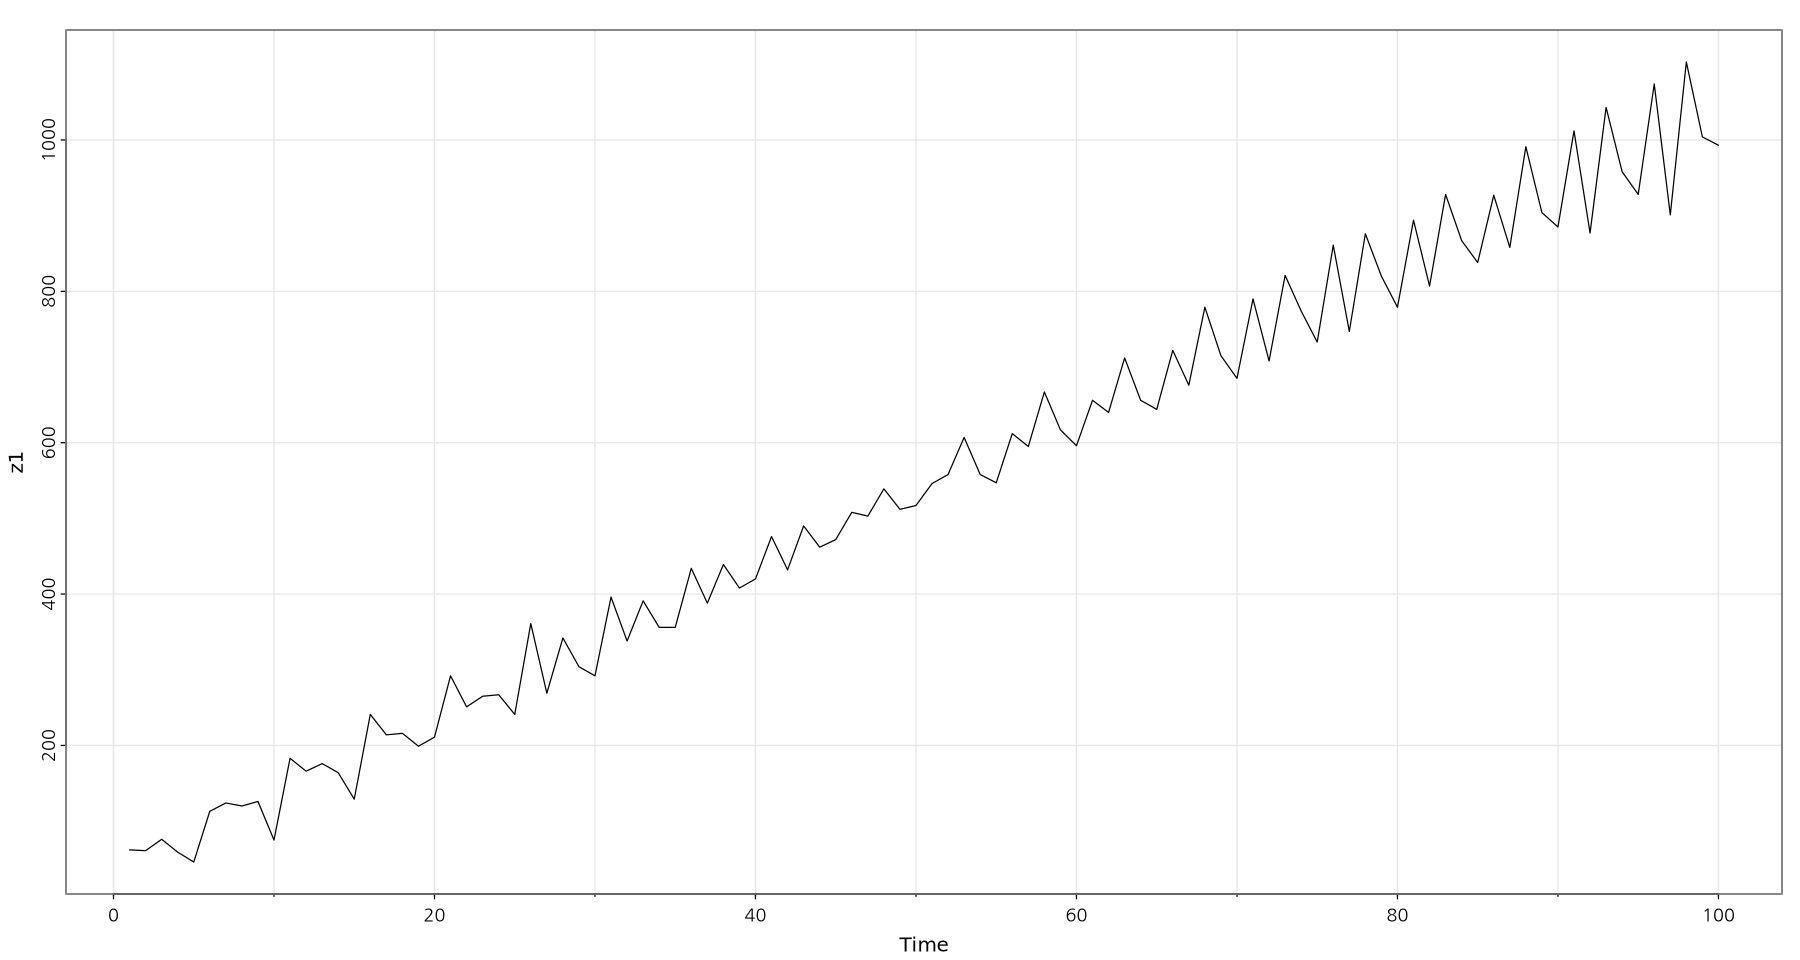

In [186]:
## data
z1 = scan("ex10_4a.txt")
z2 = scan("ex10_4b.txt")

##----------각 시계열 그림----------
tsdisplay(z1, main = "ex10_4a.txt의 시계열 그림", cex.main = 2)
tsdisplay(z2, main = "ex10_4b.txt의 시계열 그림", cex.main = 2)

## 등분산 검정
t1 = 1:length(z1)
lmtest::bptest(lm(z1~t1))
boxcox_z1 = BoxCox(z1, lambda = BoxCox.lambda(z1))
lmtest::bptest(lm(boxcox_z1~t1))
t2 = 1:length(z2)
lmtest::bptest(lm(z2~t2))

## 계절 차분
lag5_boxcox_z1 = diff(boxcox_z1, lag = 5)

## 단위근 검정
adfTest(z1, lags = 1, type = "ct")